In [1]:
import numpy as np
import torch
import torch.nn as nn
from my_dataset import MyDataset 
from voting_model import MyVoter, MyTrainedModel, MyNN, MyLinear
num_classes = 9

In [2]:
train_filepath = "../my_data/superfeatures1/train.csv"
test_filepath = "../my_data/superfeatures1/test.csv"

train_loader = MyDataset.get_loader([train_filepath], shuffle=True, batch_size=16, num_workers=0)
test_loader = MyDataset.get_loader([test_filepath], batch_size=16, num_workers=0)

train_data = np.loadtxt(train_filepath, delimiter=",", skiprows=1) #redundatn ):
test_data  = np.loadtxt(test_filepath,  delimiter=",", skiprows=1)

train_y = train_data[:, -1].astype(int)
test_y = test_data[:, -1].astype(int)

train_X1 = train_data[:, :-1]
test_X1  = test_data[:, :-1]

train_X2 = train_data[:, 320:-1]
test_X2 = test_data[:, 320:-1]

train_X3 = train_data[:, 320:-321]
test_X3 = test_data[:, 320:-321]

In [3]:
"""
NN1: Full superfeatures shallow NN
"""
max_epochs = 8
model_name = "shallownn_full_superfeatures1"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
loss_fn = nn.CrossEntropyLoss()
nn1 = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
nn1.fit(train_loader)
print(model_name, " ", num_features)
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3070 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 1.2 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
---------------------------------------------------

Epoch 7: 100%|██████████| 808/808 [00:05<00:00, 141.23it/s, v_num=6, train_acc=0.667]

`Trainer.fit` stopped: `max_epochs=8` reached.


Epoch 7: 100%|██████████| 808/808 [00:05<00:00, 140.00it/s, v_num=6, train_acc=0.667]
Fit Time (s): 44.75982117652893
shallownn_full_superfeatures1   2112
done


In [4]:
"""
NN2: Full superfeatures deeper NN
"""
max_epochs = 8
model_name = "deepernn_full_superfeatures1"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.Linear(num_features, 700),
    nn.ReLU(),
    nn.Linear(700, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
loss_fn = nn.CrossEntropyLoss()
nn2 = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
nn2.fit(train_loader)
print(model_name, " ", num_features)
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 2.0 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
2.0 M     Trainable params
0         Non-trainable params
2.0 M     Total params
7.887     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


Epoch 7: 100%|██████████| 808/808 [00:05<00:00, 146.77it/s, v_num=4, train_acc=1.000]

`Trainer.fit` stopped: `max_epochs=8` reached.


Epoch 7: 100%|██████████| 808/808 [00:05<00:00, 144.81it/s, v_num=4, train_acc=1.000]
Fit Time (s): 46.11998176574707
deepernn_full_superfeatures1   2112
done


In [5]:
"""
NN3: Full superfeatures big NN
"""
max_epochs = 6
model_name = "bignn_full_superfeatures1"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.Linear(num_features, 2048),
    nn.ReLU(),
    nn.Linear(2048, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
loss_fn = nn.CrossEntropyLoss()
nn3 = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
nn3.fit(train_loader)
print(model_name, " ", num_features)
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 5.5 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
5.5 M     Trainable params
0         Non-trainable params
5.5 M     Total params
22.041    Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


Epoch 5: 100%|██████████| 808/808 [00:05<00:00, 153.46it/s, v_num=2, train_acc=1.000]

`Trainer.fit` stopped: `max_epochs=6` reached.


Epoch 5: 100%|██████████| 808/808 [00:05<00:00, 146.88it/s, v_num=2, train_acc=1.000]
Fit Time (s): 34.81191658973694
bignn_full_superfeatures1   2112
done


In [6]:
"""
Linear1: full superfeature1 dataset
"""
num_features = train_X1.shape[1]
linear1 = MyLinear(num_classes, num_features)
linear1.fit(train_X1, train_y)
print("linear 1: ", num_features)
print("done")

linear 1:  2112
done


In [7]:
"""
Linear2: superfeature1 dataset (no meanR,C and stdR,C first 320 features)
"""
num_features = train_X2.shape[1]
linear2 = MyLinear(num_classes, num_features)
linear2.fit(train_X2, train_y)
print("linear 2: ", num_features)
print("done")

linear 2:  1792
done


In [8]:
"""
Linear3: superfeature1 dataset (no meanR,C and stdR,C first 320 features and no 90R,C and 10R,C last 320 features)
"""
num_features = train_X3.shape[1]
linear3 = MyLinear(num_classes, num_features)
linear3.fit(train_X3, train_y)
print("linear 3: ", num_features)
print("done")

linear 3:  1472
done


In [ ]:
# # weights = np.array([[1,2,1,1,1,1,1,1,1], [1,2,1,1,1,1,1,1,1], [1,1,1,2,1,1,1,1,2], [1,1,1,2,1,1,1,1,2], [1,1,1,2,1,1,1,1,2]])
# weights = np.array([[1,1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1,1]])

MyVoter: Train Dataset (before extra voter nn)
[0.79070848 0.94812234 0.96105304 0.97158343 0.97661634 0.98482385
 0.99976771 1.         1.        ]

[0.7941928  0.95423926 0.98552071 0.99876113 1.         1.
 1.         1.         1.        ]

[0.7910182  0.95996903 0.99403794 0.99806427 0.99992257 1.
 1.         1.         1.        ]

[0.79163763 0.95826558 0.99132791 0.99829655 0.99992257 1.
 1.         1.         1.        ]

[0.64467673 0.80727836 0.91180798 0.95555556 0.96686024 0.97537747
 0.99264421 1.         1.        ]

[0.64374758 0.80325203 0.91064654 0.9559427  0.96747967 0.97537747
 0.99264421 1.         1.        ]

[0.64560588 0.80588463 0.90987224 0.95029036 0.96562137 0.9754549
 0.99256678 1.         1.        ]



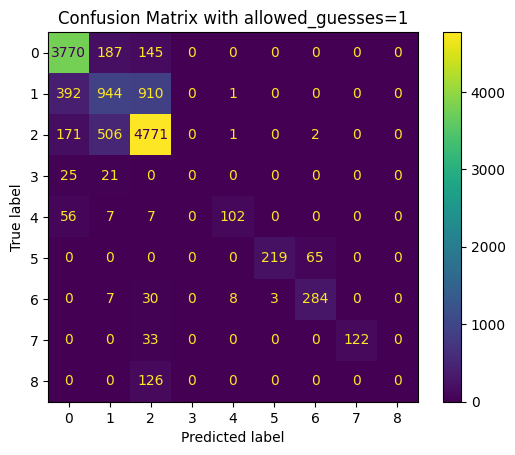

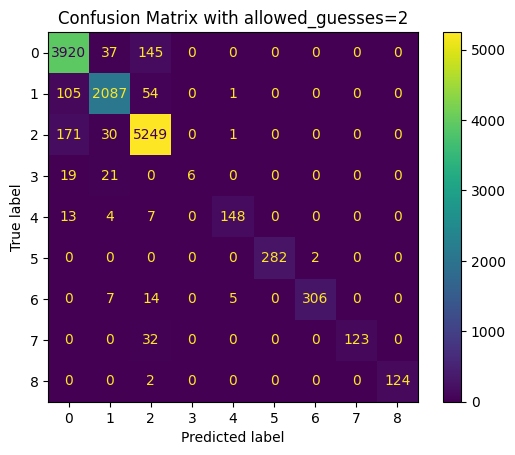

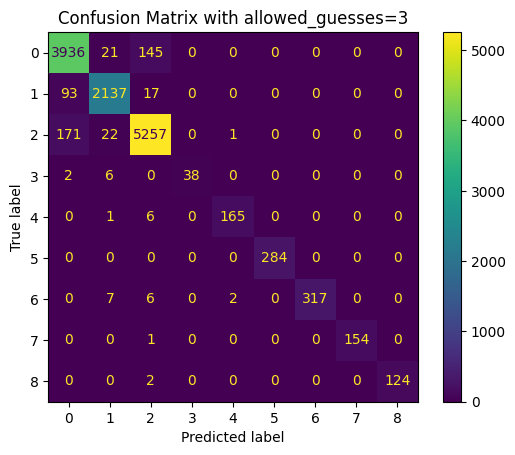

In [9]:
"""
MyVoter: Train dataset predictions
"""
trained_models = np.array([
    MyTrainedModel(nn1, num_classes, train_X1), 
    MyTrainedModel(nn2, num_classes, train_X1),
    MyTrainedModel(nn3, num_classes, train_X1),
    MyTrainedModel(linear1, num_classes, train_X1), 
    MyTrainedModel(linear2, num_classes, train_X2), 
    MyTrainedModel(linear3, num_classes, train_X3), 
    ])

voter = MyVoter(trained_models, num_classes, train_y, "voter1", "train.csv")
voter.set_probs()
voter.save_csv()
# voter.set_weights(weights=weights)
acc = voter.get_acc()
models_acc = voter.get_models_acc()

print("MyVoter: Train Dataset (before extra voter nn)")
print(acc); print()
for m in models_acc: print(m); print()
voter.diplay_confusion_matrix(1)
voter.diplay_confusion_matrix(2)
voter.diplay_confusion_matrix(3)


MyVoter: Test Dataset (before extra voter nn)
[0.77669903 0.94296117 0.95722087 0.97330097 0.97845874 0.98695388
 1.         1.         1.        ]

[0.78246359 0.9535801  0.9845267  0.99575243 0.9993932  1.
 1.         1.         1.        ]

[0.78822816 0.95661408 0.99029126 0.99696602 1.         1.
 1.         1.         1.        ]

[0.78033981 0.95813107 0.98938107 0.99575243 0.9993932  1.
 1.         1.         1.        ]

[0.63592233 0.80309466 0.90867718 0.95600728 0.9690534  0.97876214
 0.99271845 1.         1.        ]

[0.63683252 0.7976335  0.90867718 0.95570388 0.97026699 0.97876214
 0.99271845 1.         1.        ]

[0.63592233 0.80036408 0.90746359 0.95145631 0.96632282 0.97876214
 0.99271845 1.         1.        ]



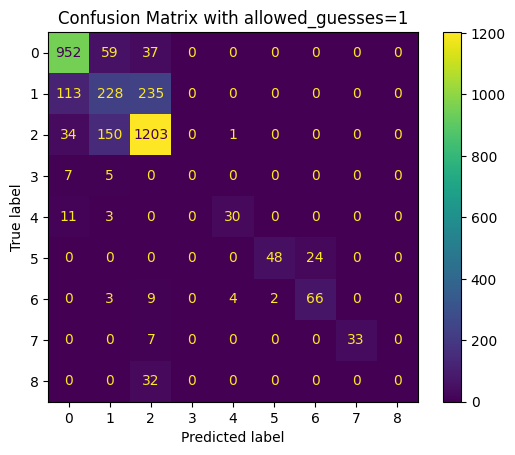

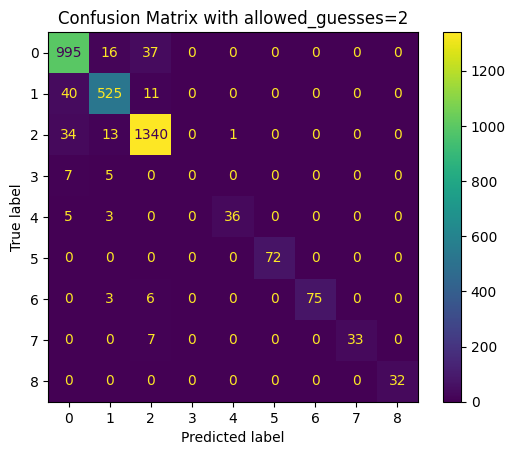

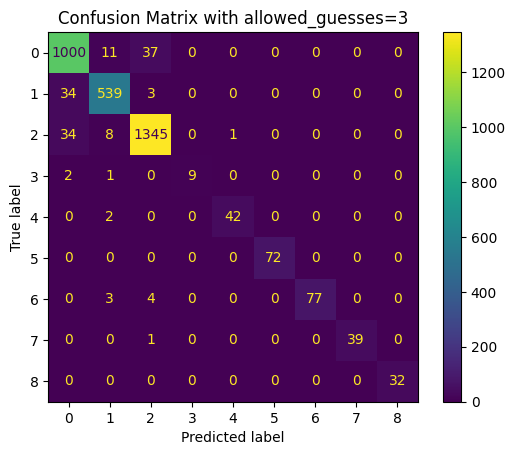

In [10]:
"""
MyVoter: Test dataset predictions
"""
trained_models = np.array([
    MyTrainedModel(nn1, num_classes, test_X1), 
    MyTrainedModel(nn2, num_classes, test_X1),
    MyTrainedModel(nn3, num_classes, test_X1),
    MyTrainedModel(linear1, num_classes, test_X1), 
    MyTrainedModel(linear2, num_classes, test_X2), 
    MyTrainedModel(linear3, num_classes, test_X3), 
    ])

voter = MyVoter(trained_models, num_classes, test_y, "voter1", "test.csv")
voter.set_probs()
voter.save_csv()
# voter.set_weights(weights=weights)
acc = voter.get_acc()
models_acc = voter.get_models_acc()

print("MyVoter: Test Dataset (before extra voter nn)")
print(acc); print()
for m in models_acc: print(m); print()
voter.diplay_confusion_matrix(1)
voter.diplay_confusion_matrix(2)
voter.diplay_confusion_matrix(3)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 17.7 K | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
17.7 K    Trainable params
0         Non-trainable params
17.7 K    Total params
0.071     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many w

Epoch 1: 100%|██████████| 808/808 [00:05<00:00, 143.27it/s, v_num=18, train_acc=0.667]

`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 1: 100%|██████████| 808/808 [00:05<00:00, 142.99it/s, v_num=18, train_acc=0.667]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Fit Time (s): 11.816542387008667
voter_nn   54
done


c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 206/206 [00:00<00:00, 300.12it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7818567752838135
        test_loss           0.5565492510795593
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Test Time (s): 0.7058184146881104


<Figure size 1600x1600 with 0 Axes>

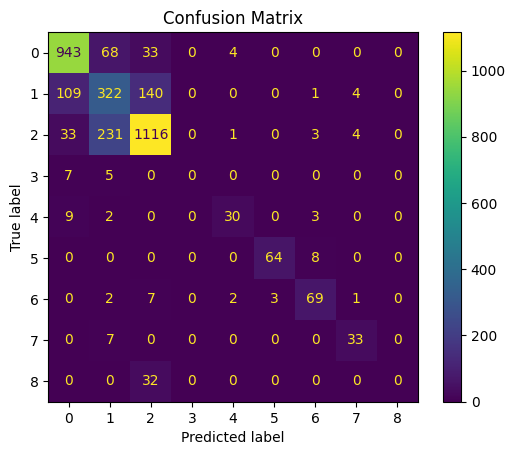

Logger Metics:  logs\voter_nn\version_18\metrics.csv


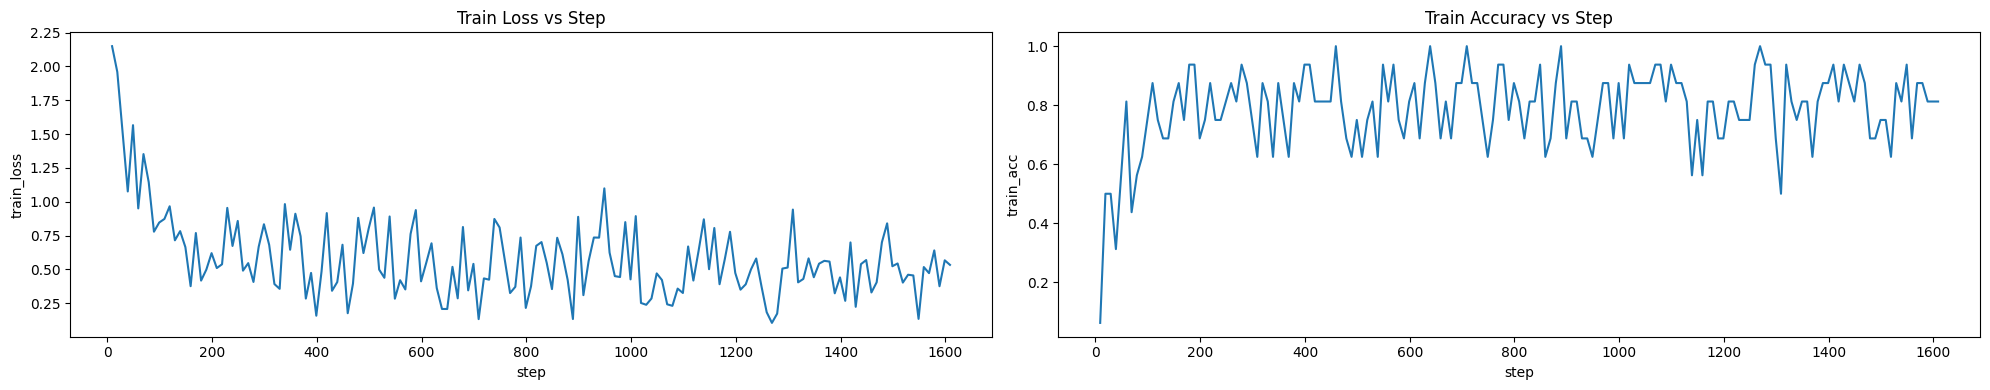

In [11]:
"""
NN: given the probs from the voter model (6 models 9 classes = 54 features), generate a model that picks weights and bias for each model class prediction
"""

train_voter_filepath = "../my_data/my_voter/voter1/train.csv"
test_voter_filepath = "../my_data/my_voter/voter1/test.csv"

train_loader = MyDataset.get_loader([train_voter_filepath], shuffle=True, batch_size=16, num_workers=0)
test_loader = MyDataset.get_loader([test_voter_filepath], batch_size=16, num_workers=0)

max_epochs = 2
model_name = "voter_nn"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.Linear(num_features, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, num_classes))
loss_fn = nn.CrossEntropyLoss()
voter_nn = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
voter_nn.fit(train_loader)
print(model_name, " ", num_features)
print("done")

voter_nn.test(test_loader)
voter_nn.display_confusion_matrix(test_loader, num_classes)
voter_nn.plot_logger()

MyVoter: Test Dataset (before extra voter nn)
[0.7818568  0.95722087 0.99150485 0.99666262 0.9993932  1.
 1.         1.         1.        ]

[0.7818568  0.95722087 0.99150485 0.99666262 0.9993932  1.
 1.         1.         1.        ]



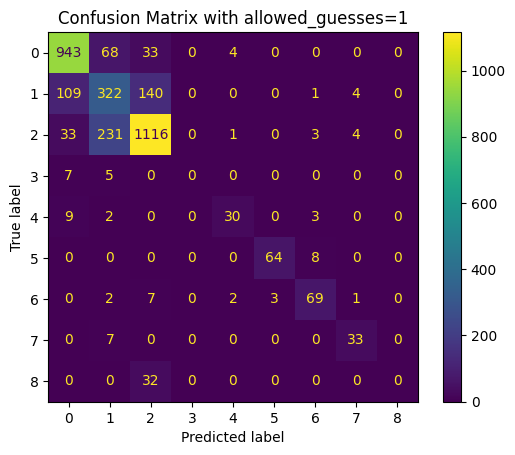

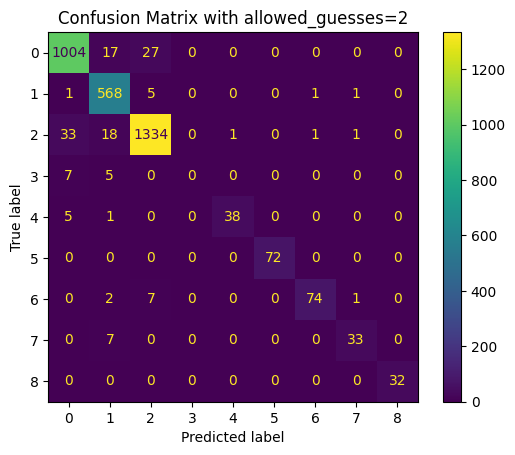

In [12]:
test_voter_filepath = "../my_data/my_voter/voter1/test.csv"
voter_nn_data = np.loadtxt(test_voter_filepath, delimiter=",", skiprows=1)
voter_nn_features = voter_nn_data[:, :-1]


trained_models = np.array([
    MyTrainedModel(voter_nn, num_classes, voter_nn_features), 
    ])

voter = MyVoter(trained_models, num_classes, test_y, "voter1", "train.csv")
voter.set_probs()
voter.save_csv()
acc = voter.get_acc()
models_acc = voter.get_models_acc()

print("MyVoter: Test Dataset (before extra voter nn)")
print(acc); print()
for m in models_acc: print(m); print()
voter.diplay_confusion_matrix(1)
voter.diplay_confusion_matrix(2)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 5.9 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
5.9 K     Trainable params
0         Non-trainable params
5.9 K     Total params
0.024     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many w

Epoch 0: 100%|██████████| 808/808 [00:05<00:00, 149.49it/s, v_num=8, train_acc=1.000]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 808/808 [00:05<00:00, 149.10it/s, v_num=8, train_acc=1.000]
Fit Time (s): 5.446108341217041
voter_nn   54
done


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 206/206 [00:00<00:00, 306.15it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7773058414459229
        test_loss           0.5816963911056519
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Test Time (s): 0.6930017471313477


<Figure size 1600x1600 with 0 Axes>

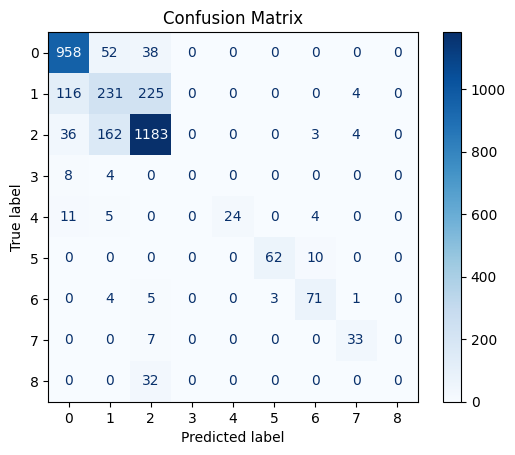

Logger Metics:  logs\voter_nn\version_8\metrics.csv


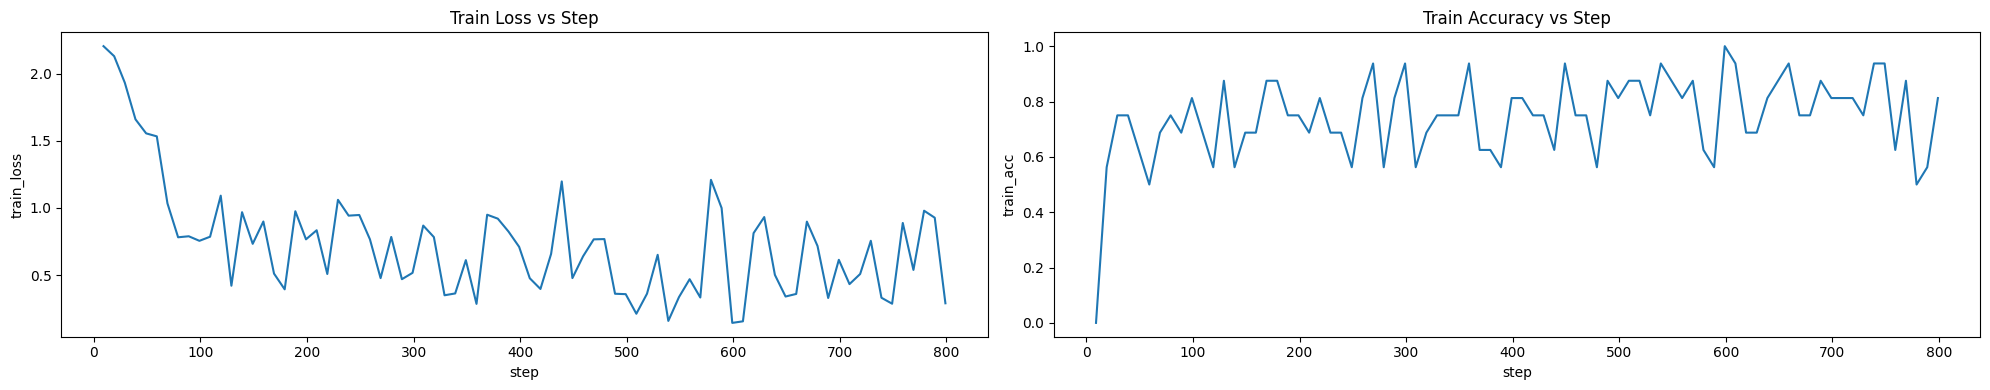

In [6]:
"""
NN: given the probs from the voter model (6 models 9 classes = 54 features), generate a model that picks weights and bias for each model class prediction
"""

train_voter_filepath = "../my_data/my_voter/voter1/train.csv"
test_voter_filepath = "../my_data/my_voter/voter1/test.csv"

train_loader = MyDataset.get_loader([train_voter_filepath], shuffle=True, batch_size=16, num_workers=0)
test_loader = MyDataset.get_loader([test_voter_filepath], batch_size=16, num_workers=0)

max_epochs = 1
model_name = "voter_nn"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.Linear(num_features, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, num_classes))
loss_fn = nn.CrossEntropyLoss()
voter_nn = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
voter_nn.fit(train_loader)
print(model_name, " ", num_features)
print("done")

voter_nn.test(test_loader)
voter_nn.display_confusion_matrix(test_loader, num_classes)
voter_nn.plot_logger()

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 17.7 K | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
17.7 K    Trainable params
0         Non-trainable params
17.7 K    Total params
0.071     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many w

Epoch 0: 100%|██████████| 808/808 [00:05<00:00, 146.82it/s, v_num=9, train_acc=0.667]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 808/808 [00:05<00:00, 146.52it/s, v_num=9, train_acc=0.667]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Fit Time (s): 5.531410455703735
voter_nn   54
done


c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 206/206 [00:00<00:00, 325.84it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7791262269020081
        test_loss           0.6133248209953308
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Test Time (s): 0.6499223709106445


<Figure size 1600x1600 with 0 Axes>

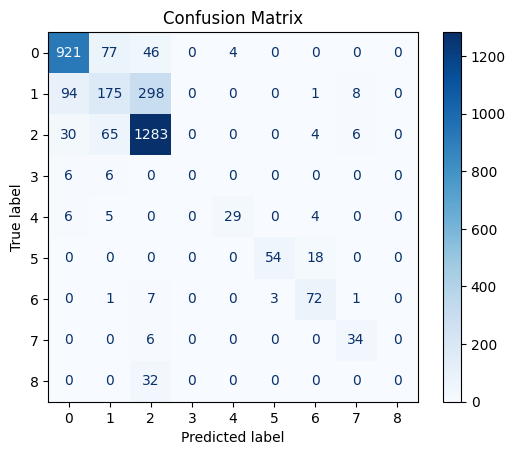

Logger Metics:  logs\voter_nn\version_9\metrics.csv


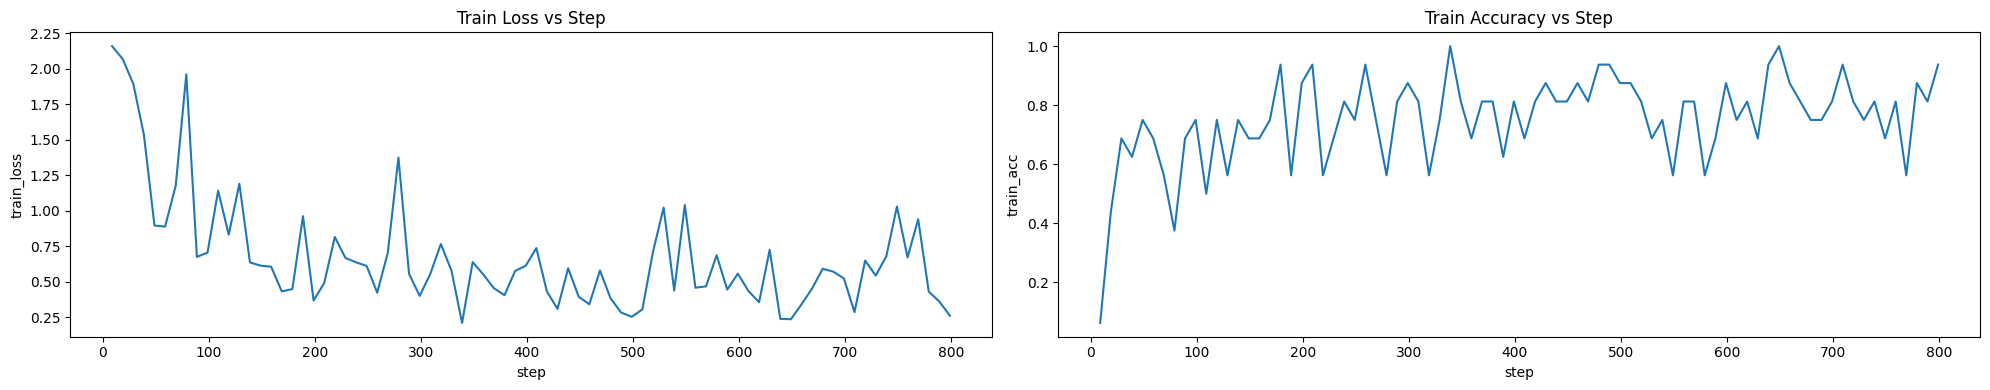

In [7]:
"""
NN: given the probs from the voter model (6 models 9 classes = 54 features), generate a model that picks weights and bias for each model class prediction
"""

train_voter_filepath = "../my_data/my_voter/voter1/train.csv"
test_voter_filepath = "../my_data/my_voter/voter1/test.csv"

train_loader = MyDataset.get_loader([train_voter_filepath], shuffle=True, batch_size=16, num_workers=0)
test_loader = MyDataset.get_loader([test_voter_filepath], batch_size=16, num_workers=0)

max_epochs = 1
model_name = "voter_nn"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.Linear(num_features, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, num_classes))
loss_fn = nn.CrossEntropyLoss()
voter_nn = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
voter_nn.fit(train_loader)
print(model_name, " ", num_features)
print("done")

voter_nn.test(test_loader)
voter_nn.display_confusion_matrix(test_loader, num_classes)
voter_nn.plot_logger()

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 16.0 K | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
16.0 K    Trainable params
0         Non-trainable params
16.0 K    Total params
0.064     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode
c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many w

Epoch 0: 100%|██████████| 808/808 [00:05<00:00, 143.70it/s, v_num=10, train_acc=0.667]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 808/808 [00:05<00:00, 143.36it/s, v_num=10, train_acc=0.667]
Fit Time (s): 5.669319152832031
voter_nn   54
done


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 206/206 [00:00<00:00, 334.96it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7581917643547058
        test_loss           0.6920021772384644
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Test Time (s): 0.632502555847168


<Figure size 1600x1600 with 0 Axes>

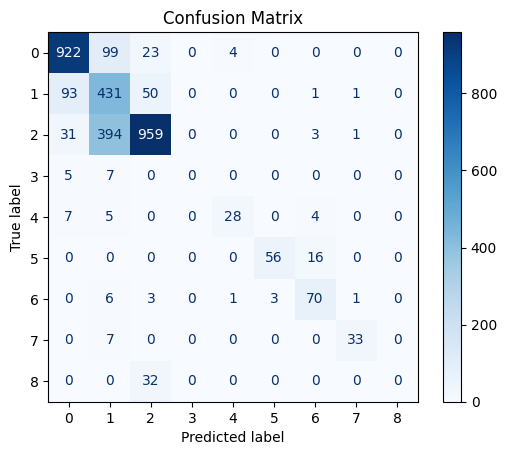

Logger Metics:  logs\voter_nn\version_10\metrics.csv


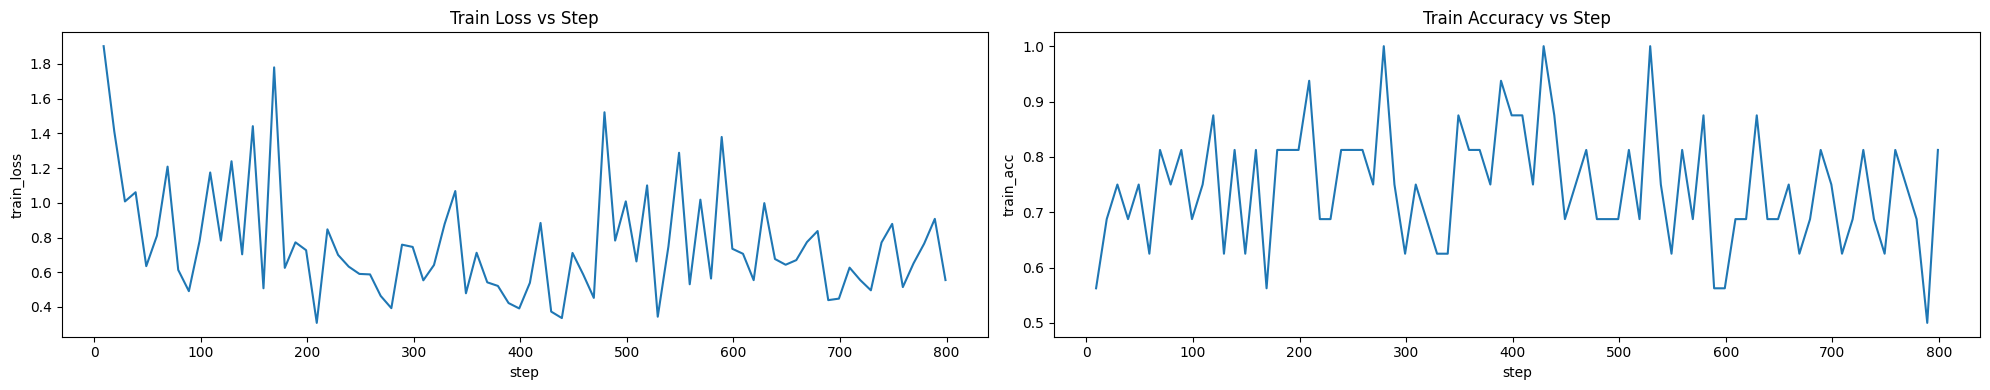

In [9]:
"""
NN: given the probs from the voter model (6 models 9 classes = 54 features), generate a model that picks weights and bias for each model class prediction
"""

train_voter_filepath = "../my_data/my_voter/voter1/train.csv"
test_voter_filepath = "../my_data/my_voter/voter1/test.csv"

train_loader = MyDataset.get_loader([train_voter_filepath], shuffle=True, batch_size=16, num_workers=0)
test_loader = MyDataset.get_loader([test_voter_filepath], batch_size=16, num_workers=0)

max_epochs = 1
model_name = "voter_nn"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.LayerNorm(num_features),          
    nn.Linear(num_features, 128),
    nn.GELU(),
    nn.Dropout(p=0.3),
    nn.Linear(128, 64),
    nn.GELU(),
    nn.Dropout(p=0.2),
    nn.Linear(64, num_classes))
class_weights = torch.ones(num_classes)
class_weights[1] = 2.5
class_weights[3] = 5
class_weights[8] = 3.5
loss_fn = nn.CrossEntropyLoss(weight=class_weights)
voter_nn = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
voter_nn.fit(train_loader)
print(model_name, " ", num_features)
print("done")

voter_nn.test(test_loader)
voter_nn.display_confusion_matrix(test_loader, num_classes)
voter_nn.plot_logger()

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 16.0 K | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
16.0 K    Trainable params
0         Non-trainable params
16.0 K    Total params
0.064     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode
c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many w

Epoch 4: 100%|██████████| 808/808 [00:05<00:00, 153.77it/s, v_num=11, train_acc=0.667]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 808/808 [00:05<00:00, 153.52it/s, v_num=11, train_acc=0.667]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Fit Time (s): 27.05487084388733
voter_nn   54
done


c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 206/206 [00:00<00:00, 324.45it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7709344625473022
        test_loss           0.6588037014007568
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Test Time (s): 0.6511185169219971


<Figure size 1600x1600 with 0 Axes>

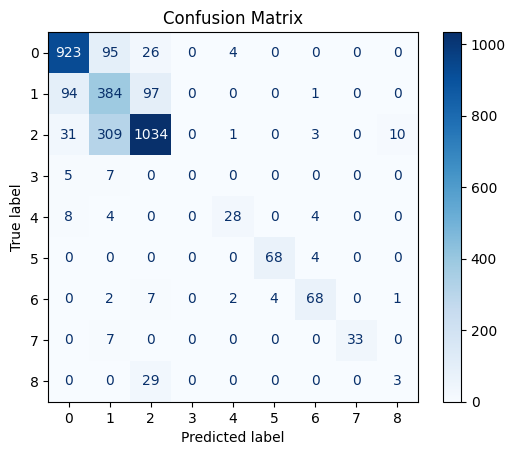

Logger Metics:  logs\voter_nn\version_11\metrics.csv


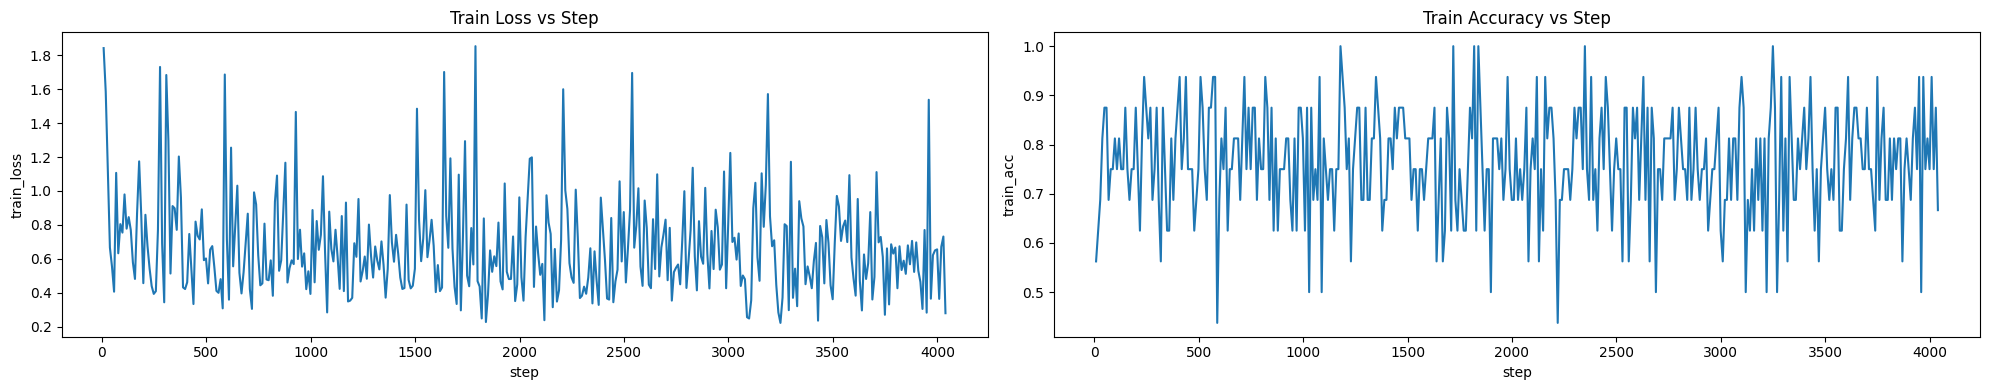

In [ ]:
"""
NN: given the probs from the voter model (6 models 9 classes = 54 features), generate a model that picks weights and bias for each model class prediction
"""

train_voter_filepath = "../my_data/my_voter/voter1/train.csv"
test_voter_filepath = "../my_data/my_voter/voter1/test.csv"

train_loader = MyDataset.get_loader([train_voter_filepath], shuffle=True, batch_size=16, num_workers=0)
test_loader = MyDataset.get_loader([test_voter_filepath], batch_size=16, num_workers=0)

max_epochs = 5
model_name = "voter_nn"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.LayerNorm(num_features),          
    nn.Linear(num_features, 128),
    nn.GELU(),
    nn.Dropout(p=0.3),
    nn.Linear(128, 64),
    nn.GELU(),
    nn.Dropout(p=0.2),
    nn.Linear(64, num_classes))

loss_fn = nn.CrossEntropyLoss(weight=class_weights)
voter_nn = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
voter_nn.fit(train_loader)
print(model_name, " ", num_features)
print("done")

voter_nn.test(test_loader)
voter_nn.display_confusion_matrix(test_loader, num_classes)
voter_nn.plot_logger()

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 16.0 K | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
16.0 K    Trainable params
0         Non-trainable params
16.0 K    Total params
0.064     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode


Epoch 0: 100%|██████████| 808/808 [00:05<00:00, 143.80it/s, v_num=13, train_acc=0.667]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 808/808 [00:05<00:00, 143.56it/s, v_num=13, train_acc=0.667]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.



Fit Time (s): 5.643373727798462
voter_nn   54
done
Testing DataLoader 0: 100%|██████████| 206/206 [00:00<00:00, 315.30it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7412014603614807
        test_loss           0.6567181348800659
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Test Time (s): 0.6643519401550293


<Figure size 1600x1600 with 0 Axes>

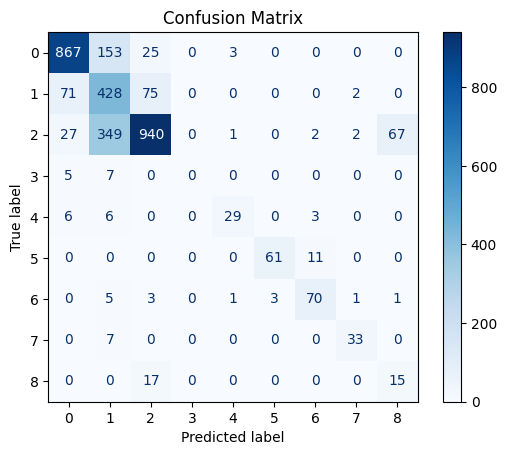

Logger Metics:  logs\voter_nn\version_13\metrics.csv


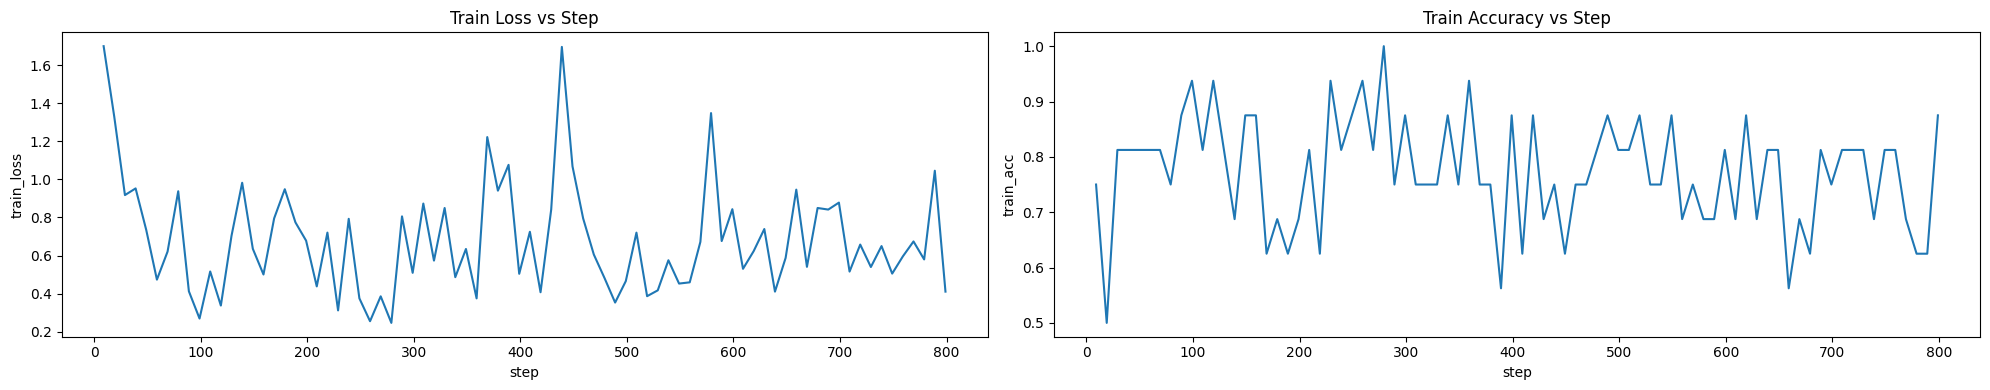

In [12]:
"""
NN: given the probs from the voter model (6 models 9 classes = 54 features), generate a model that picks weights and bias for each model class prediction
"""

train_voter_filepath = "../my_data/my_voter/voter1/train.csv"
test_voter_filepath = "../my_data/my_voter/voter1/test.csv"

train_loader = MyDataset.get_loader([train_voter_filepath], shuffle=True, batch_size=16, num_workers=0)
test_loader = MyDataset.get_loader([test_voter_filepath], batch_size=16, num_workers=0)

max_epochs = 1
model_name = "voter_nn"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.LayerNorm(num_features),          
    nn.Linear(num_features, 128),
    nn.GELU(),
    nn.Linear(128, 64),
    nn.GELU(),
    nn.Linear(64, num_classes))

loss_fn = nn.CrossEntropyLoss(weight=class_weights)
voter_nn = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
voter_nn.fit(train_loader)
print(model_name, " ", num_features)
print("done")

voter_nn.test(test_loader)
voter_nn.display_confusion_matrix(test_loader, num_classes)
voter_nn.plot_logger()

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 17.7 K | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
17.7 K    Trainable params
0         Non-trainable params
17.7 K    Total params
0.071     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode
c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many w

Epoch 1: 100%|██████████| 808/808 [00:05<00:00, 142.04it/s, v_num=16, train_acc=0.667]

`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 1: 100%|██████████| 808/808 [00:05<00:00, 141.82it/s, v_num=16, train_acc=0.667]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.



Fit Time (s): 11.28765320777893
voter_nn   54
done
Testing DataLoader 0: 100%|██████████| 206/206 [00:00<00:00, 349.30it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7581917643547058
        test_loss           0.6708971858024597
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Test Time (s): 0.5997674465179443


<Figure size 1600x1600 with 0 Axes>

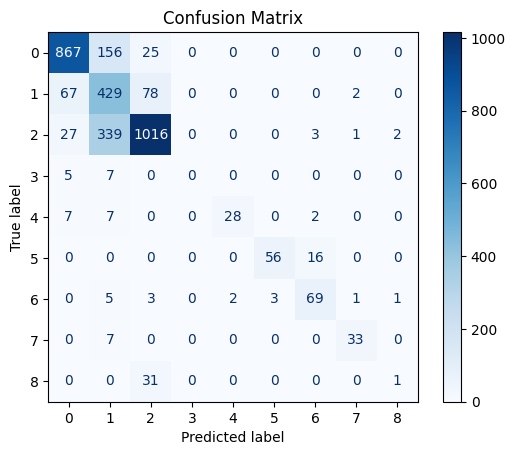

Logger Metics:  logs\voter_nn\version_16\metrics.csv


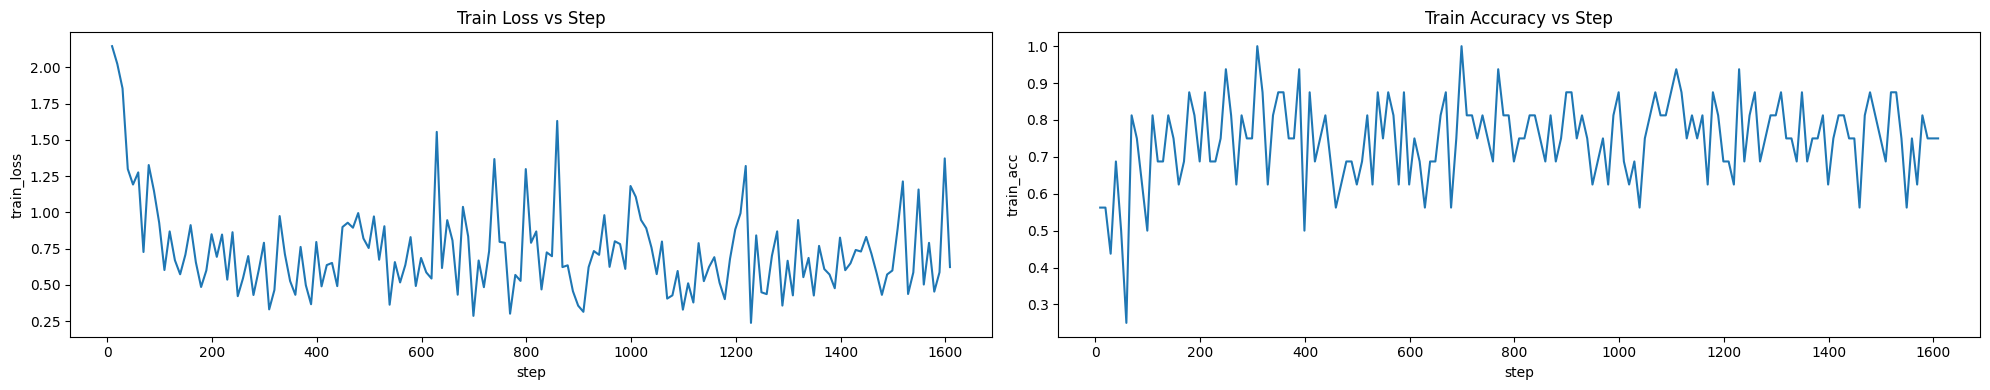

In [15]:
"""
NN: given the probs from the voter model (6 models 9 classes = 54 features), generate a model that picks weights and bias for each model class prediction
"""

train_voter_filepath = "../my_data/my_voter/voter1/train.csv"
test_voter_filepath = "../my_data/my_voter/voter1/test.csv"

train_loader = MyDataset.get_loader([train_voter_filepath], shuffle=True, batch_size=16, num_workers=0)
test_loader = MyDataset.get_loader([test_voter_filepath], batch_size=16, num_workers=0)

max_epochs = 2
model_name = "voter_nn"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.Linear(num_features, 128),
    nn.GELU(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.GELU(),
    nn.Dropout(0.3),
    nn.Linear(64, 32),
    nn.GELU(),
    nn.Linear(32, num_classes))
loss_fn = nn.CrossEntropyLoss(weight=class_weights)
voter_nn = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
voter_nn.fit(train_loader)
print(model_name, " ", num_features)
print("done")

voter_nn.test(test_loader)
voter_nn.display_confusion_matrix(test_loader, num_classes)
voter_nn.plot_logger()




MyVoter: Train Dataset (before extra voter nn)
[0.64374758 0.80325203 0.91064654 0.9559427  0.96747967 0.97537747
 0.99264421 1.         1.        ]

[0.64374758 0.80325203 0.91064654 0.9559427  0.96747967 0.97537747
 0.99264421 1.         1.        ]

Epoch 1:  80%|███████▉  | 644/808 [5:58:36<1:31:19,  0.03it/s, v_num=12, train_acc=0.625]


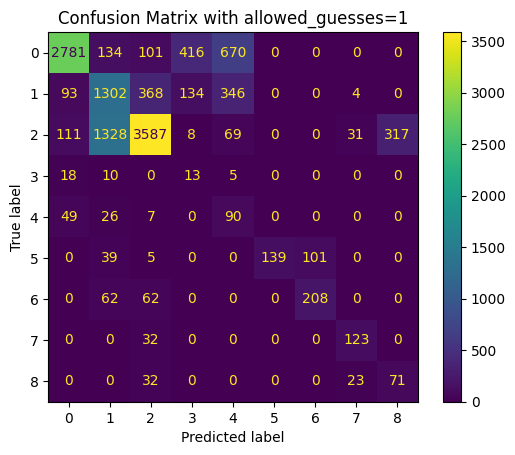

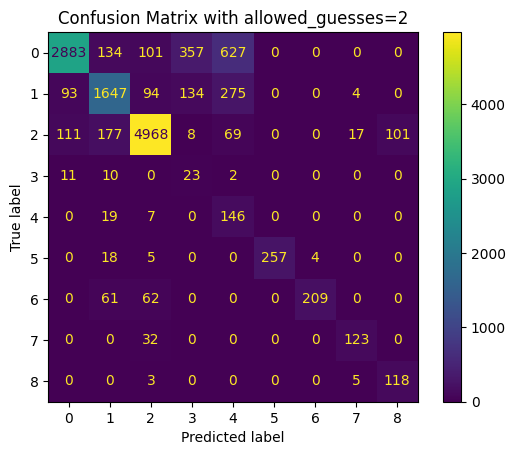

MyVoter: Test Dataset (before extra voter nn)
[0.63683252 0.7976335  0.90867718 0.95570388 0.97026699 0.97876214
 0.99271845 1.         1.        ]

[0.63683252 0.7976335  0.90867718 0.95570388 0.97026699 0.97876214
 0.99271845 1.         1.        ]



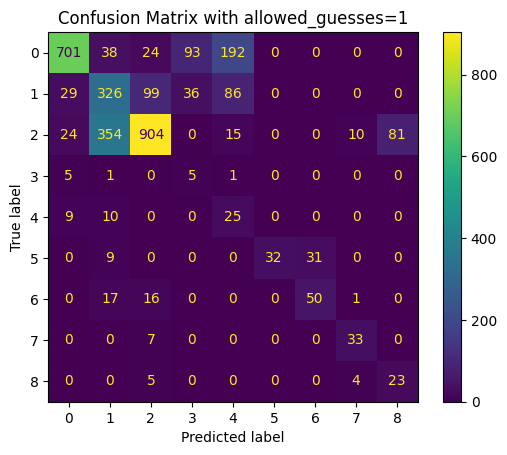

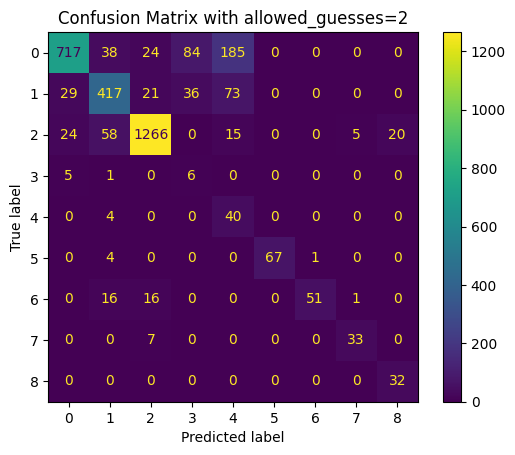

In [21]:
"""
MyVoter: Train dataset predictions
"""
trained_models = np.array([
    MyTrainedModel(linear2, num_classes, train_X2), 
    ])



voter = MyVoter(trained_models, num_classes, train_y, "voter1", "train.csv")
voter.set_probs()
voter.save_csv()
# voter.set_weights(weights=weights)
acc = voter.get_acc()
models_acc = voter.get_models_acc()

print("MyVoter: Train Dataset (before extra voter nn)")
print(acc); print()
for m in models_acc: print(m); print()
voter.diplay_confusion_matrix(1)
voter.diplay_confusion_matrix(2)

"""
MyVoter: Test dataset predictions
"""
trained_models = np.array([
    MyTrainedModel(linear2, num_classes, test_X2), 
    ])


voter = MyVoter(trained_models, num_classes, test_y, "voter1", "test.csv")
voter.set_probs()
voter.save_csv()
# voter.set_weights(weights=weights)
acc = voter.get_acc()
models_acc = voter.get_models_acc()

print("MyVoter: Test Dataset (before extra voter nn)")
print(acc); print()
for m in models_acc: print(m); print()
voter.diplay_confusion_matrix(1)
voter.diplay_confusion_matrix(2)


MyVoter: Train Dataset (before extra voter nn)
[0.78041038 0.9501355  0.99210221 0.9973674  1.         1.
 1.         1.         1.        ]

[0.78041038 0.9501355  0.99210221 0.9973674  1.         1.
 1.         1.         1.        ]



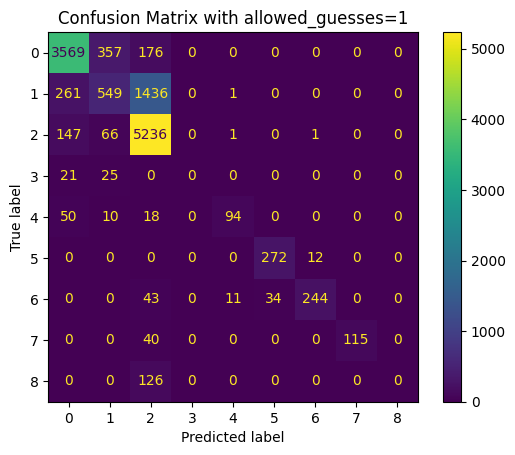

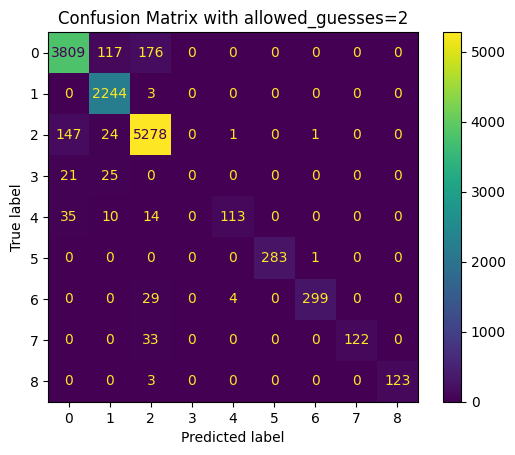

MyVoter: Test Dataset (before extra voter nn)
[0.77063107 0.94872573 0.98968447 0.99514563 0.9993932  0.9996966
 1.         1.         1.        ]

[0.77063107 0.94872573 0.98968447 0.99514563 0.9993932  0.9996966
 1.         1.         1.        ]



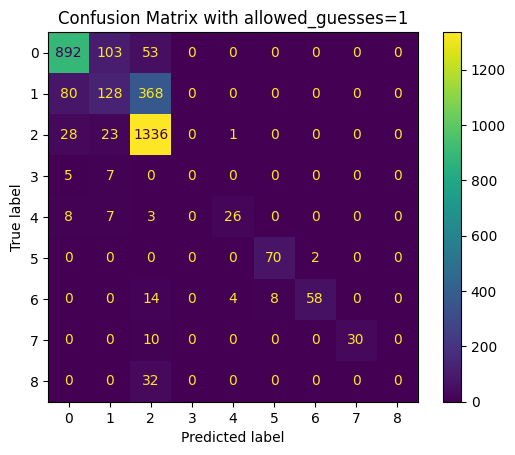

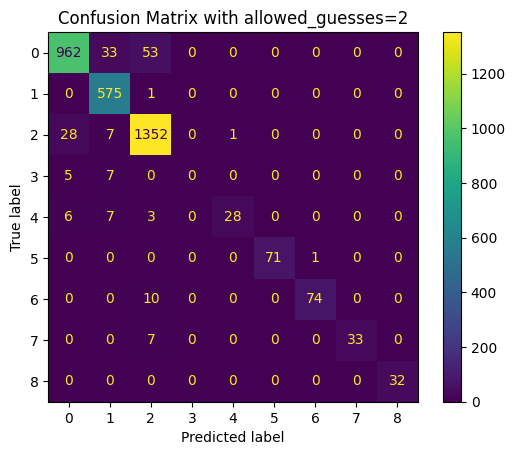

In [23]:
"""
MyVoter: Train dataset predictions
"""
trained_models = np.array([
    MyTrainedModel(nn1, num_classes, train_X1), 
    ])

voter = MyVoter(trained_models, num_classes, train_y, "voter1", "train.csv")
voter.set_probs()
voter.save_csv()
acc = voter.get_acc()
models_acc = voter.get_models_acc()

print("MyVoter: Train Dataset (before extra voter nn)")
print(acc); print()
for m in models_acc: print(m); print()
voter.diplay_confusion_matrix(1)
voter.diplay_confusion_matrix(2)


"""
MyVoter: test dataset predictions
"""
trained_models = np.array([
    MyTrainedModel(nn1, num_classes, test_X1), 
    ])

voter = MyVoter(trained_models, num_classes, test_y, "voter1", "test.csv")
voter.set_probs()
voter.save_csv()
# voter.set_weights(weights=weights)
acc = voter.get_acc()
models_acc = voter.get_models_acc()

print("MyVoter: Test Dataset (before extra voter nn)")
print(acc); print()
for m in models_acc: print(m); print()
voter.diplay_confusion_matrix(1)
voter.diplay_confusion_matrix(2)